<a href="https://colab.research.google.com/github/sigwela/ML-Model---Projects/blob/main/xgboost_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost Regressor

### Part 1 - Prepare Data

In [23]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import xgboost
from sklearn.metrics import r2_score
from xgboost import XGBRegressor


In [7]:


dataset = pd.read_csv('insurance.csv')

In [8]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking missing data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Handling categorical variables

Sex column

In [9]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
dataset['sex']= dataset['sex'].apply(lambda x: 0 if x=="female" else 1)
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


Smoker column

In [11]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
dataset['smoker']= dataset['smoker'].apply(lambda x: 0 if x=="yes" else 1)
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,northwest,10600.54830
1334,18,0,31.920,0,1,northeast,2205.98080
1335,18,0,36.850,0,1,southeast,1629.83350
1336,21,0,25.800,0,1,southwest,2007.94500


Region column

In [13]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
region_dummies = pd.get_dummies(dataset['region'], drop_first=True, dtype=int)
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [15]:
dataset=pd.concat([region_dummies,dataset],axis=1)
dataset

,northwest,southeast,southwest,age,sex,bmi,children,smoker,region,charges
0,0,0,1,19,0,27.900,0,0,southwest,16884.92400
1,0,1,0,18,1,33.770,1,1,southeast,1725.55230
2,0,1,0,28,1,33.000,3,1,southeast,4449.46200
3,1,0,0,33,1,22.705,0,1,northwest,21984.47061
4,1,0,0,32,1,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,1,0,0,50,1,30.970,3,1,northwest,10600.54830
1334,0,0,0,18,0,31.920,0,1,northeast,2205.98080
1335,0,1,0,18,0,36.850,0,1,southeast,1629.83350
1336,0,0,1,21,0,25.800,0,1,southwest,2007.94500


In [16]:
dataset.drop(columns="region",axis=1,inplace=True)


In [17]:
dataset

,northwest,southeast,southwest,age,sex,bmi,children,smoker,charges
0,0,0,1,19,0,27.900,0,0,16884.92400
1,0,1,0,18,1,33.770,1,1,1725.55230
2,0,1,0,28,1,33.000,3,1,4449.46200
3,1,0,0,33,1,22.705,0,1,21984.47061
4,1,0,0,32,1,28.880,0,1,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,1,0,0,50,1,30.970,3,1,10600.54830
1334,0,0,0,18,0,31.920,0,1,2205.98080
1335,0,1,0,18,0,36.850,0,1,1629.83350
1336,0,0,1,21,0,25.800,0,1,2007.94500


### Split Data

Getting the inputs and output

In [18]:
X=dataset.iloc[:,:-1].values
X.shape

(1338, 8)

In [19]:
y=dataset.iloc[:,-1].values
y.shape

(1338,)

Getting the Training Set and the Test Set

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape)

(1070, 8) (268, 8) (1070,) (268,)


### Part 2 - Building and training the model

### Instantiate the Model Class

In [24]:
model=XGBRegressor()

### Training the model

In [25]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

###  inference

In [27]:
 y_pred_test =model.predict(X_test)
 y_pred_test[:20]

array([10083.838 ,  7742.762 , 46423.664 , 11340.579 ,  9828.638 ,
        7766.7695,   837.2472,  9468.67  ,  7593.59  ,  6376.6772,
        6389.1016, 20784.61  ,  8196.428 ,  9244.154 , 28719.697 ,
       16030.136 , 12336.959 ,  8097.138 ,  6219.824 , 33011.016 ],
      dtype=float32)

## Part 3: Evaluating the model

### R-Squared

In [28]:
r2 = r2_score(y_test,y_pred_test)

In [29]:
r2

0.8670003485392761

### Adjusted R-Squared

In [30]:
k=X_test.shape[1]  # number of features
n=X_test.shape[0]  # number of observations

adj_r2 =1-(1-r2)*(n-1)/(n-k-1)


In [31]:
adj_r2

0.86289225119686

### k-Fold Cross Validation

In [32]:
r2s=cross_val_score(estimator=model,
                    X=X,
                    y=y,
                    scoring='r2',
                    cv=10)
print( "Average R-Squared: {:.3f}".format(r2s.mean()))
print( "Satandard Deviation: {:.3f}".format(r2s.std()))

Average R-Squared: 0.811
Satandard Deviation: 0.053


### Communicate Results

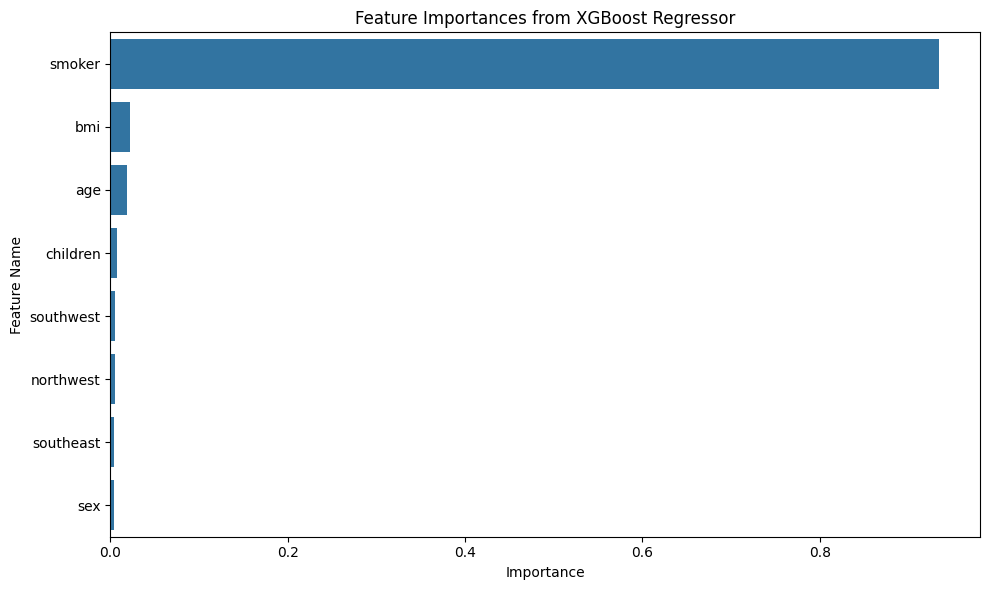

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get feature names from the dataset. We exclude the last column ('charges') as it's the target variable.
feature_names = dataset.iloc[:, :-1].columns

# Create a DataFrame to combine feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order for better visualization
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using a bar plot
plt.figure(figsize=(10, 6)) # Set the figure size for better clarity
sns.barplot(x='Importance', y='Feature', data=importance_df) # Create the bar plot
plt.title('Feature Importances from XGBoost Regressor') # Add a title to the plot
plt.xlabel('Importance') # Label the x-axis
plt.ylabel('Feature Name') # Label the y-axis
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

The feature importances plot shows the relative importance of each feature in predicting insurance charges, as determined by the XGBoost Regressor model. From the plot, we can clearly see that:

'smoker' is overwhelmingly the most important feature, contributing the vast majority of the predictive power.
'bmi' and 'age' are the next most important features, though significantly less impactful than 'smoker'.
'children' also has some influence.
The 'region' dummy variables ('southwest', 'northwest', 'southeast') and 'sex' have very little importance in this model.
This suggests that whether a person smokes is the primary factor driving insurance charges, followed by their BMI and age.